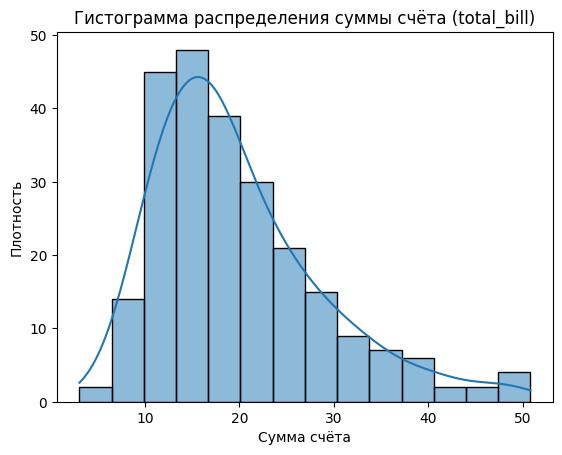

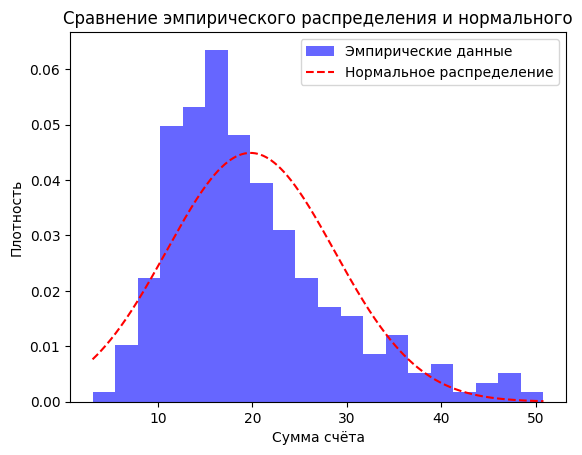

            Характеристика   Значение
0  Математическое ожидание  19.785943
1                Дисперсия  78.928131
2               Асимметрия   1.126235
3                  Эксцесс   1.169168
4            0.05-квантиль   9.557500
5            0.95-квантиль  38.061000
6            2.5%-квантиль   7.785750


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm

# 1. Загрузка реального набора данных из библиотеки seaborn
data = sns.load_dataset("tips")['total_bill']

# 2. Вычисление характеристик распределения
mean = np.mean(data)
variance = np.var(data)
skewness = skew(data)
excess_kurtosis = kurtosis(data)
quantile_0_05 = np.percentile(data, 5)
quantile_0_95 = np.percentile(data, 95)
quantile_2_5 = np.percentile(data, 2.5)

# 3. Построение гистограммы и оценка плотности для данных
sns.histplot(data, kde=True)
plt.title("Гистограмма распределения суммы счёта (total_bill)")
plt.xlabel("Сумма счёта")
plt.ylabel("Плотность")
plt.show()

# 4. Сравнительная диаграмма эмпирических данных и нормального распределения
x = np.linspace(min(data), max(data), 1000)
normal_dist = norm.pdf(x, mean, np.sqrt(variance))

plt.hist(data, bins=20, density=True, alpha=0.6, color="blue", label="Эмпирические данные")
plt.plot(x, normal_dist, 'r--', label="Нормальное распределение")
plt.title("Сравнение эмпирического распределения и нормального")
plt.xlabel("Сумма счёта")
plt.ylabel("Плотность")
plt.legend()
plt.show()

# 5. Вывод расчётных характеристик в таблице
stats_df = pd.DataFrame({
    "Характеристика": ["Математическое ожидание", "Дисперсия", "Асимметрия", "Эксцесс", "0.05-квантиль", "0.95-квантиль", "2.5%-квантиль"],
    "Значение": [mean, variance, skewness, excess_kurtosis, quantile_0_05, quantile_0_95, quantile_2_5]
})

print(stats_df)
